# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # try 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted, high initial speed
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse; watch for bandwidth
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 year has small problem, good overall
# ipath= "./data/NCDC/cn/luogang/dat.txt" # recent 5 year has small problem, good overall
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # watch for bandwidth? could apply width/length constrain
# ipath= "./data/NCDC/cn/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # With 0 
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # With 0 
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data
# ipath= "./data/NCDC/gran_canaria/dat.txt" # problem
# ipath= "./data/NCDC/tenerife_norte/dat.txt" # truncate

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir <= 999) & (speed <= 999) & \
              (date >= 19800000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


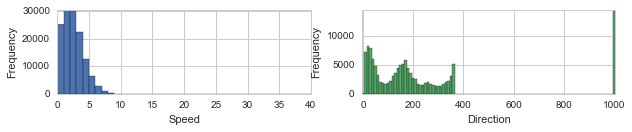

In [4]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [5]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date           HrMn            dir          speed  dir_windrose
count  1.317670e+05  131767.000000  131767.000000  131767.000000  131767.00000
mean   2.003839e+07     992.689292     258.366192       2.342578     229.19602
std    1.000501e+05     679.931123     278.811451       1.708145     286.23713
min    1.980010e+07       0.000000       0.000000       0.000000       0.00000
25%    2.001102e+07     400.000000      70.000000       1.000000      40.00000
50%    2.006073e+07     900.000000     190.000000       2.100000     150.00000
75%    2.011032e+07    1400.000000     300.000000       3.600000     250.00000
max    2.015123e+07    2354.000000     999.000000      20.600000     999.00000

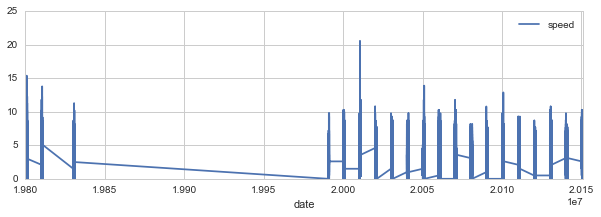

In [6]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


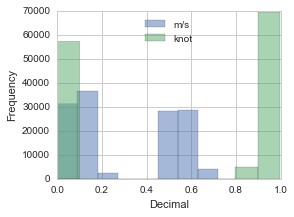

In [7]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt_configure('Decimal','Frequency')
    plt.legend(loc='best')

print knot_unit

### 1.2.2 Sampling Type Selection

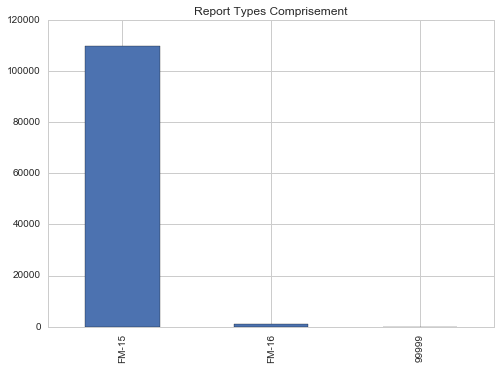

In [8]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

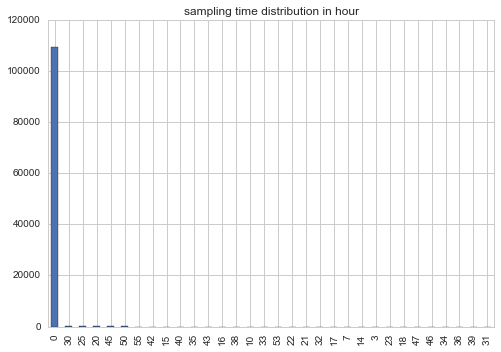

In [9]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution in hour')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [10]:
df['HrMn'].value_counts().sort_index()

0       6110
100     6198
200     6197
300     6147
400     6148
500     6165
600     6110
700     6135
800     6134
900     6112
1000    6125
1100    6137
1200    6112
1300    6134
1400    6118
1500    6059
1600      63
1700      60
1800      34
1900      58
2000      51
2100    6029
2200    6089
2300    6070
Name: HrMn, dtype: int64

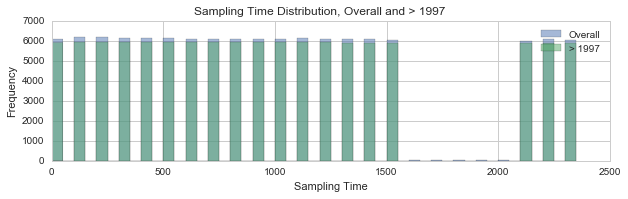

In [11]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(10, 2.5), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [12]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  dir_windrose   decimal
30963  19990915  2200  FM-15   86      1         N             4  0.971923
31190  19990928   200  FM-15   89      2         N             1  0.943845
31903  19991106  2200  FM-15   86      1         N             4  0.971923
32457  19991207  1300  FM-15   86      9         N             4  0.941687
32816  19991228  2100  FM-15  146      3         N           304  0.915768
36231  20000701  1100  FM-15  262      5         N           188  0.053997
48784  20020530   100  FM-15   59      3         N            31  0.915768
49525  20020710   300  FM-15   79      2         N            11  0.943845
58978  20031205  2200  FM-15   65      5         N            25  0.053997
60113  20040206   900  FM-15   39      5         N            51  0.053997
79156  20061011   700  FM-15  276      5         N           174  0.053997
82499  20070321  1400  FM-15   58      3         N            32  0.110152
82718  20070331  1300  FM-15  153      2         N           297  0.138230
84003  20070531  1000  FM-15   59      1         N            31  0.166307

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  dir_windrose   decimal  \
42477   20010615  1200  FM-15  200     40         N           250  0.043207   
106479  20100819  1100  FM-15  300     25         N           150  0.075601   
45813   20011220   900  FM-15   70     23         N            20  0.937371   
83200   20070423   700  FM-15   90     23         N             0  0.937371   
70244   20050730   400  FM-15  130     23         N           320  0.937371   
28481   19830723   200  FM-15  180     22         N           270  0.965449   
28239   19830627   100  FM-15  150     21         N           300  0.993526   
46571   20020131   900  FM-15   70     21         N            20  0.993526   
125734  20130601   900  FM-15   60     21         N            30  0.993526   
44545   20011010   800  FM-15  100     21         N           350  0.993526   

        incre  incre_reverse  
42477    36.0           38.0  
106479   19.0           21.0  
45813     7.0            7.0  
83200    14.0           20.0  
70244    17.0           12.0  
28481    19.0           22.0  
28239    20.0            7.0  
46571     6.0            7.0  
125734   13.0           17.0  
44545    15.0           18.0

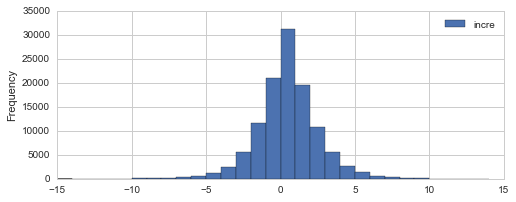

In [13]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [14]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 1


After Simple Aretefacts Handling

In [15]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn   type  dir  speed wind_type  dir_windrose   decimal  \
106479  20100819  1100  FM-15  300     25         N           150  0.075601   
83200   20070423   700  FM-15   90     23         N             0  0.937371   
45813   20011220   900  FM-15   70     23         N            20  0.937371   
70244   20050730   400  FM-15  130     23         N           320  0.937371   
28481   19830723   200  FM-15  180     22         N           270  0.965449   
95457   20090114   300  FM-15   70     21         N            20  0.993526   
125734  20130601   900  FM-15   60     21         N            30  0.993526   
28239   19830627   100  FM-15  150     21         N           300  0.993526   
46571   20020131   900  FM-15   70     21         N            20  0.993526   
44545   20011010   800  FM-15  100     21         N           350  0.993526   

        incre  incre_reverse  
106479   19.0           21.0  
83200    14.0           20.0  
45813     7.0            7.0  
70244    17.0           12.0  
28481    19.0           22.0  
95457     7.0            4.0  
125734   13.0           17.0  
28239    20.0            7.0  
46571     6.0            7.0  
44545    15.0           18.0

### 1.3.2 Re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [16]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print len(effective_column), SECTOR_LENGTH

0       1450
10      1599
20      1729
30      2569
40      3831
50      4807
60      6667
70      7507
80      6668
90      4850
100     2898
110     2014
120     1762
130     1474
140     1185
150     1150
160     1137
170     1317
180     1495
190     1756
200     1640
210     1422
220     1365
230     1497
240     2252
250     2373
260     3170
270     3954
280     5389
290     4790
300     4614
310     4055
320     3244
330     2713
340     2009
350     1666
999    12562
Name: dir, dtype: int64

36 10.0


In [17]:
if len(effective_column) == 16:    
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_column.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

### 1.3.4 Dir 999 Handling (Zero Speed and Variable Direction)

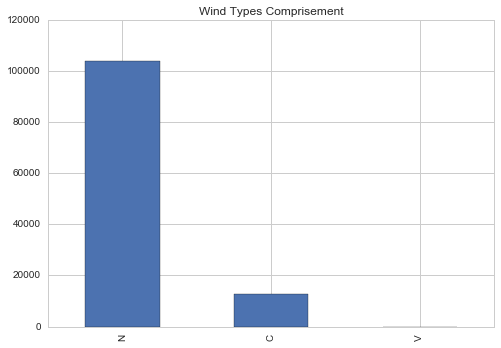

In [18]:
df['wind_type'].value_counts().plot(
    kind = 'bar', title = 'Wind Types Comprisement')

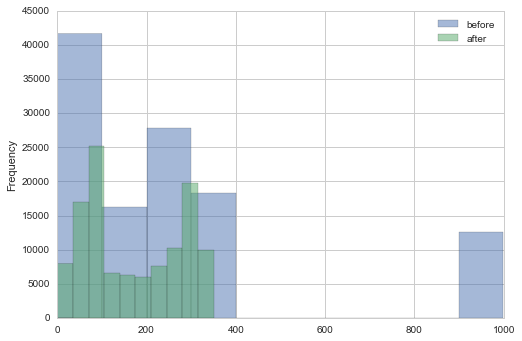

In [19]:
df['dir'].plot(kind='hist', alpha=0.5, label='before')
df['dir'] = df.apply(lambda x: np.nan if x.dir == 999 else x.dir, axis=1)
df['dir'] = df['dir'].interpolate()//SECTOR_LENGTH*SECTOR_LENGTH
df['dir'].plot(kind='hist', alpha=0.5, label='after')
plt.legend()

### 1.3.5 Time Shift Comparison

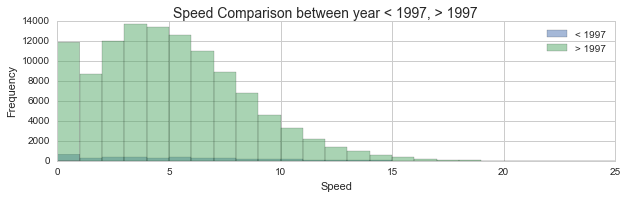

In [20]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(10, 2.5))

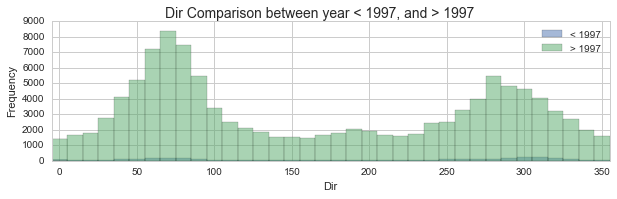

In [21]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(10, 2.5),tight='x')

1995 - 1999


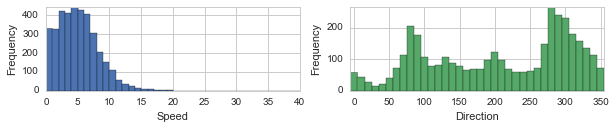

2000 - 2004


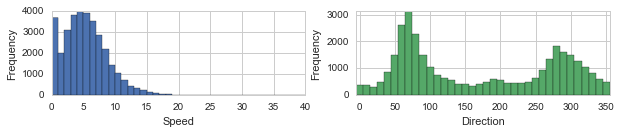

2005 - 2009


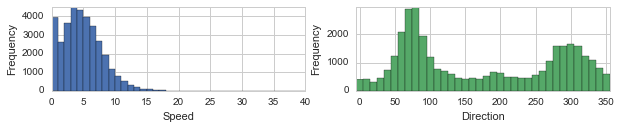

2010 - 2014


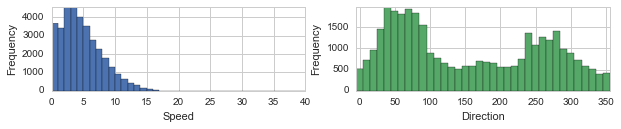

In [22]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

## 1.4 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [23]:
def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5, label='Original Data')
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5, label='Redistributed Data')
    plt_configure(xlabel="Direction", ylabel="Frequency", tight='x',
                  legend={'loc':'best'}, figsize=(10, 4))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

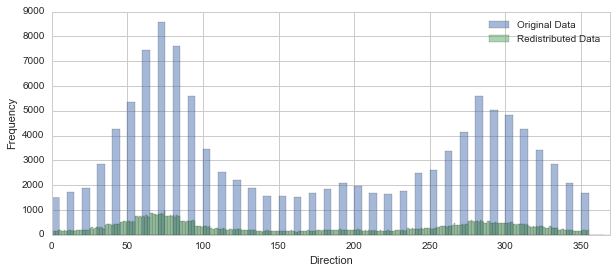

In [24]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [25]:
def randomize_speed(df):
    # Round down speed, need more caution
    if len(df.query('speed < 1')) > 200:
        # if has zero data
        print 'Contain 0, Redistribute upward, e.g. 0 -> [0,1]'
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(0,1)))
    else:
        # if lack zero
        print 'N0 0, Redistribute downward, e.g. 1 -> [0,1]'
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Original Data')
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5, label='Redistributed Data')
    plt_configure(xlabel="Speed", ylabel="Frequency", legend=True, figsize=(10, 4))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

Contain 0, Redistribute upward, e.g. 0 -> [0,1]


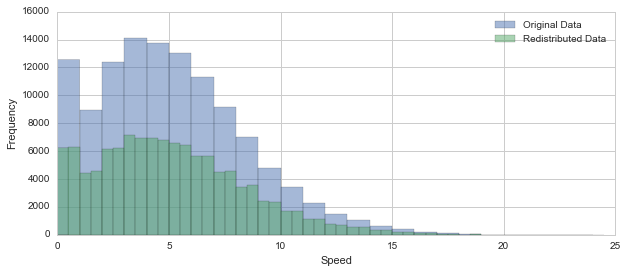

In [26]:
df = randomize_speed(df)

## 1.5 Generate (x,y) from (speed,dir)

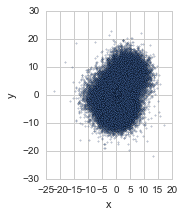

In [27]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots()
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax, s=2)
plt.gcf().set_size_inches(14, 3)

## 1.6 Re-select data, and overview of the clean dataset

In [28]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 20
Report type used: FM-15
Sampling time used: 0


date          HrMn           dir         speed  dir_windrose  \
count  3.451900e+04  34519.000000  34519.000000  34519.000000  34519.000000   
mean   2.012064e+07    979.165097    153.849300      4.806842    233.121788   
std    1.413766e+04    677.927853    102.901452      3.247964    282.375912   
min    2.010010e+07      0.000000     -4.989497      0.000291      0.000000   
25%    2.011040e+07    400.000000     61.115153      2.338241     50.000000   
50%    2.012063e+07    900.000000    130.312706      4.245824    160.000000   
75%    2.013093e+07   1400.000000    253.051305      6.769818    260.000000   
max    2.014123e+07   2300.000000    354.981295     25.476331    999.000000   

            decimal         incre  incre_reverse             x             y  
count  34519.000000  34519.000000   34519.000000  34519.000000  34519.000000  
mean       0.545143      0.000174      -0.000145      0.578055      0.256497  
std        0.451468      2.028407       2.028414      3.500078      4.583140  
min        0.000000    -21.000000     -19.000000    -15.811961    -21.731788  
25%        0.053997     -1.000000      -1.000000     -1.205556     -2.815309  
50%        0.915768      0.000000       0.000000      0.428864      0.478243  
75%        0.943845      1.000000       1.000000      2.469604      2.900131  
max        0.997842     19.000000      21.000000     15.691325     19.199279

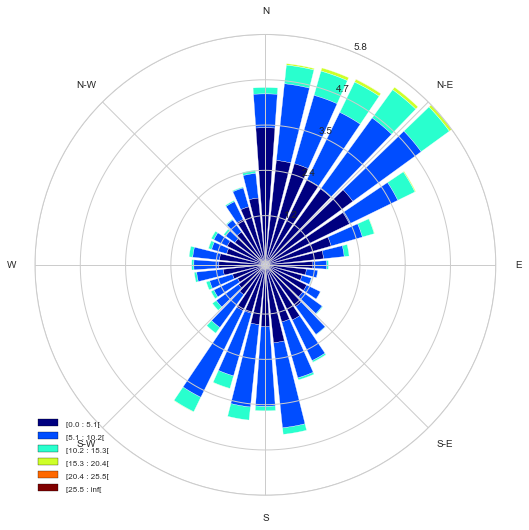

In [29]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

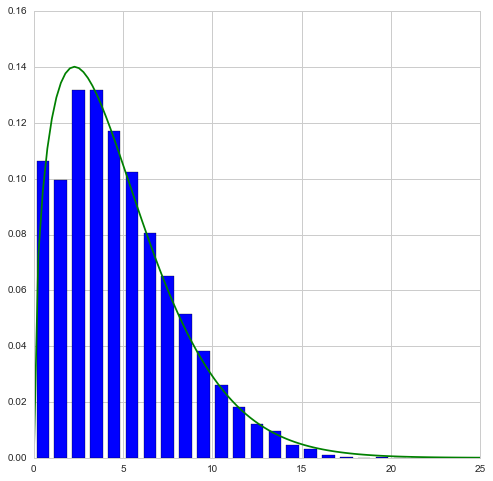

In [30]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

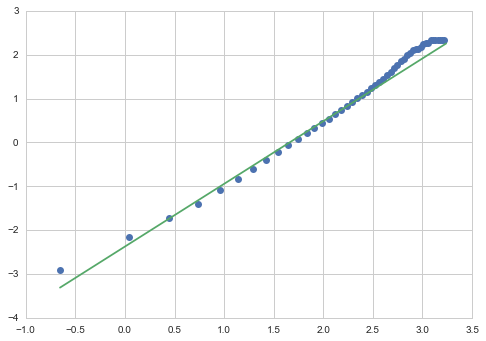

In [31]:
ecdf = sm.distributions.ECDF(df.speed)

x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-')

# 2. Create input data, i.e. speed_set

In [32]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [33]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.  11.]


In [34]:
plot_limit = ceil(df['speed'].quantile(.975))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [35]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL = 'tophat'
# bandwidth = 1

In [36]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if knot_unit:
    bandwidth_range = arange(0.5,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range},
                    n_jobs=-1, cv=4) 
grid.fit(sample)
bandwidth = grid.best_params_['bandwidth']

In [37]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 0.7 529
[  1.32926299e-05   1.06956365e-05   1.39925430e-05   1.67745979e-05
   2.10320468e-05]


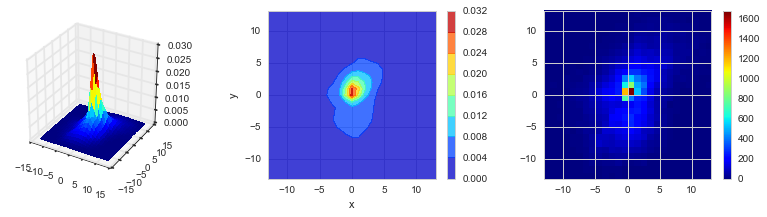

In [38]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1,3,1,projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)

ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,kde_Z,ax2,xlabel='x', ylabel='y')

ax3 = fig.add_subplot(1,3,3)
ax3.set_aspect('equal')
with sns.axes_style({'axes.grid' : False}):
    plt.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='jet')
    plt.colorbar()

In [39]:
# plot_2d_prob_density(X,Y,kde_Z, xlabel='x', ylabel='y')
# plt.gcf().set_size_inches(4, 2.5)

In [40]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [41]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [42]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.366  1.175   3.724  4.735  3.950  0.463
2  0.329  0.003  -4.364  3.060  3.042  0.278
3  0.304  0.482   1.088  1.533  1.401  0.338

GMM Plot Result
0.366082813452 [[ 1.17535948  3.72395852]] [ 3.11516619  5.32178559] -55.7366928971
0.329474754457 [[  3.16004772e-03  -4.36443268e+00]] [ 2.59312286  3.44844324] -45.627060782
0.30444243209 [[ 0.48197792  1.08785958]] [ 1.18548326  1.70528659] -52.4966121762


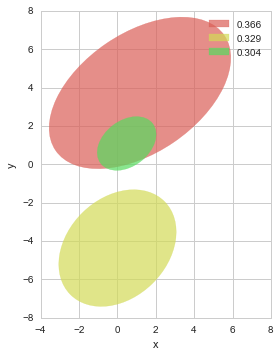

In [43]:
plot_gmm_ellipses(gmm_em_result)

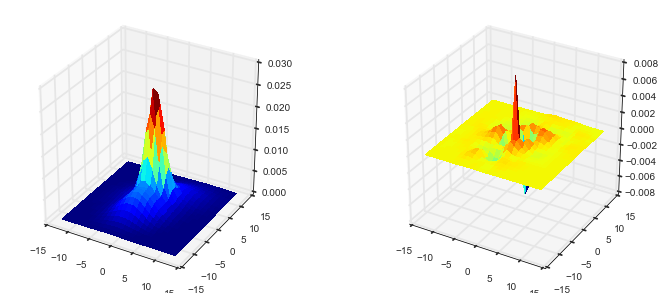

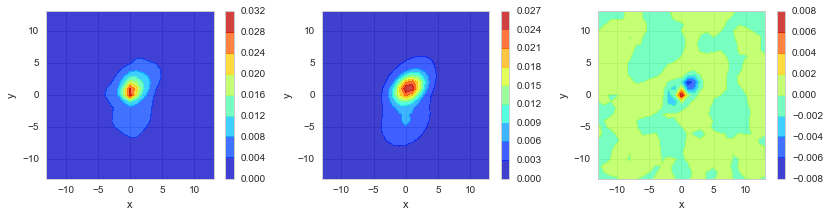

In [44]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1, xlabel='x',ylabel='y')
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2, xlabel='x',ylabel='y')
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3, xlabel='x',ylabel='y')

## Goodness-of-fit Statistics

In [45]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.949  0.018      0.038  5.443423e-07      0.025       0.398

# 5. GMM by Optimization

In [46]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()

In [47]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.494269789189106
     jac: array([  2.49479032e+00,   0.00000000e+00,  -1.19209290e-07,
         0.00000000e+00,  -1.19209290e-07,  -1.19209290e-07,
         2.49478960e+00,  -2.38418579e-07,   1.19209290e-07,
         0.00000000e+00,  -1.19209290e-07,   0.00000000e+00,
         2.49479008e+00,   0.00000000e+00,   1.19209290e-07,
         0.00000000e+00,   1.19209290e-07,   1.19209290e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 799
     nit: 39
    njev: 39
  status: 0
 success: True
       x: array([ 0.29359894,  0.44849524, -4.67350506,  3.04311554,  3.14818909,
        0.40381581,  0.1505396 ,  0.20330936,  0.69197165,  0.95446896,
        1.08479953,  0.16046589,  0.55586146,  0.78928786,  2.24714119,
        3.78889947,  3.47084308,  0.46486945])

## 5.1 GMM Result

In [48]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.556  0.789   2.247  3.789  3.471  0.465
2  0.294  0.448  -4.674  3.043  3.148  0.404
3  0.151  0.203   0.692  0.954  1.085  0.160

GMM Plot Result
0.555861455125 [[ 0.78928786  2.24714119]] [ 2.64194046  4.40711487] -50.3471712818
0.293598941309 [[ 0.44849524 -4.67350506]] [ 2.38819921  3.66989799] 137.403008984
0.150539603566 [[ 0.20330936  0.69197165]] [ 0.91167188  1.12100642] 154.326903079


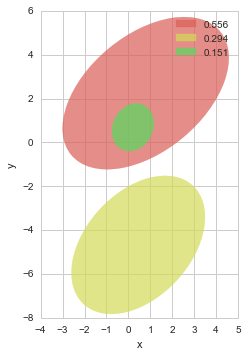

In [49]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit statistics

In [50]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.031      0.164  1.866054e-07      0.014       0.233

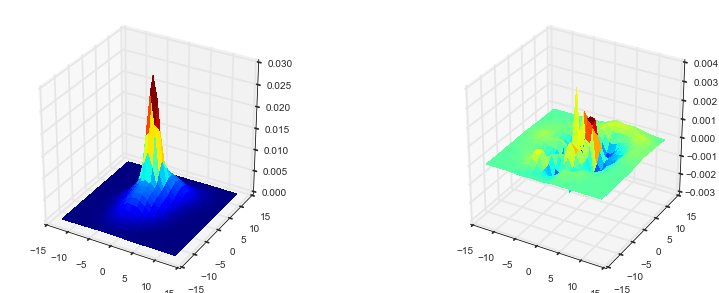

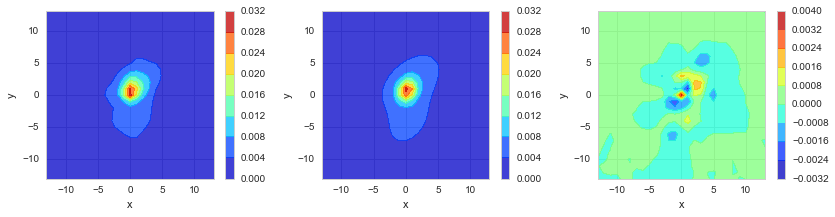

In [51]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2, projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1, xlabel='x',ylabel='y')
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2, xlabel='x',ylabel='y')
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3, xlabel='x',ylabel='y')

In [52]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

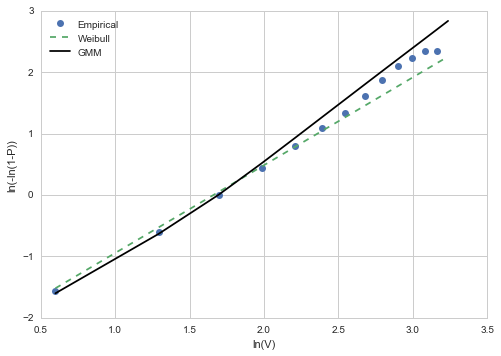

In [53]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

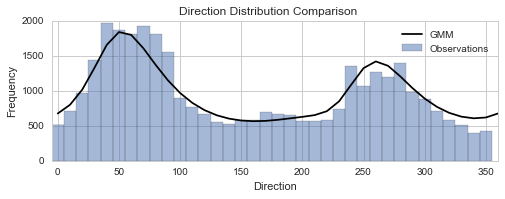

In [54]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(zip(*y_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Observations')
plot(x/pi*180, y,'-', color='black', label='GMM')
plt_configure(title='Direction Distribution Comparison',
              xlabel='Direction',ylabel='Frequency', legend={'loc': 'best'} ,tight='xtight',figsize = (8,2.5))
dir_fig = plt.gcf()

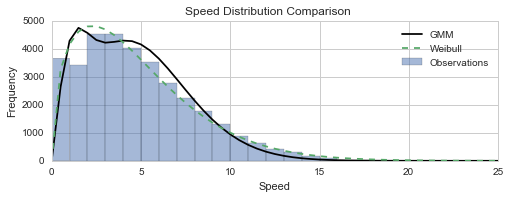

In [55]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(zip(*y_)[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Observations')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', label='Weibull')   

plt_configure(title='Speed Distribution Comparison',
              xlabel='Speed',ylabel='Frequency',legend=True, figsize=(8, 2.5))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)

## 5.3 Sectoral Comaprison

In [56]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(14,2))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_df.speed.max()), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_ =[integrate.nquad(f, [[x_-0.1, x_+0.1],
                                 [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y = array(zip(*y_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plot(x, y,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(sub_df.speed)
        plot(x, y_weibul, '--', label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency')
        if angle == start: plt.legend() 
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],
                                  [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(zip(*y_)[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
        plot(x, y_ecdf,'o', label='Data')
        plot(x, y_cdf_gmm,'-', color='red', label='GMM')
        plot(x, y_cdf_weibull,'--', label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P')
        if angle == start: plt.legend() 
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o',label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='red',label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--', label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)")
        plt.gca().set_xlim(right = log(max_speed+2))
        plt.locator_params(nbins=5)
        if angle == start: plt.legend(loc='best') 
        
        title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
        plt.suptitle(title,y=1)
        
        diff = abs(y_ecdf - y_cdf_gmm)
        diff_weibull = abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()]])
        
        plt.show()
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()]
    return max_diff_array

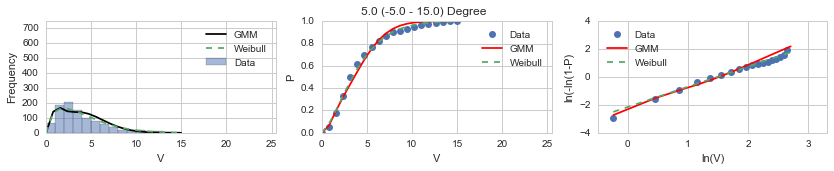

data size: 970
max diff: 0.0669459574964 , speed value: 3.94083070461 y gmm 0.548517960029


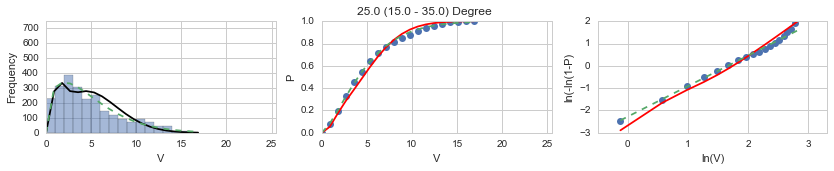

data size: 2420
max diff: 0.0697051495681 , speed value: 3.54846260638 y gmm 0.384840304977


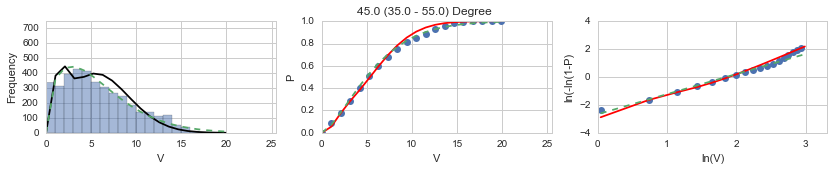

data size: 3849
max diff: 0.0544030938237 , speed value: 10.4669012233 y gmm 0.906312680729


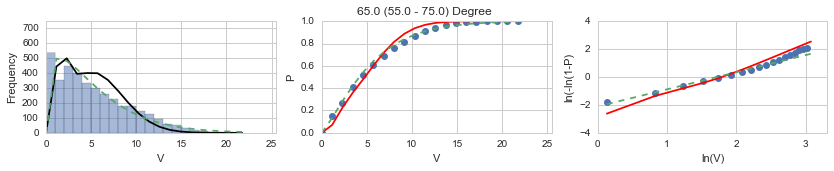

data size: 3748
max diff: 0.0850018473815 , speed value: 1.14345025242 y gmm 0.0697473521916


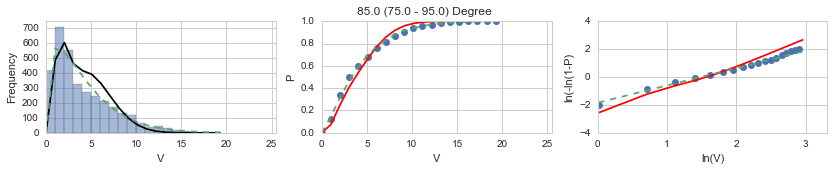

data size: 3380
max diff: 0.0920720603097 , speed value: 3.04449425016 y gmm 0.410590661584


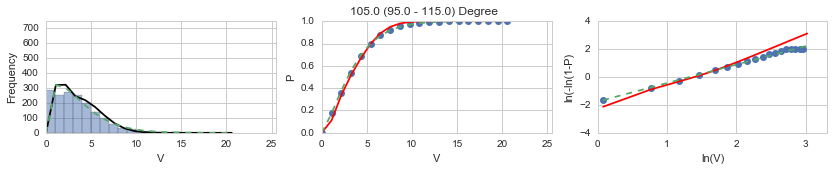

data size: 1662
max diff: 0.0682932984906 , speed value: 1.08337042326 y gmm 0.111610431955


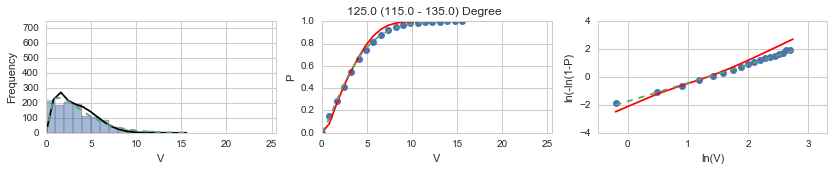

data size: 1215
max diff: 0.0671254014336 , speed value: 0.817949708565 y gmm 0.0793766561796


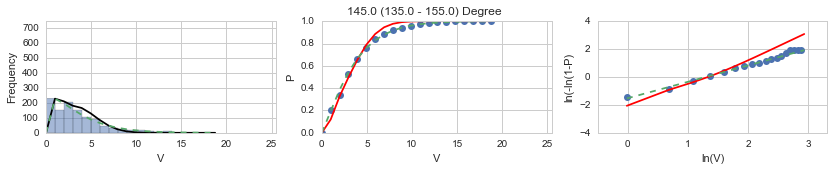

data size: 1103
max diff: 0.0884607184795 , speed value: 0.986531250849 y gmm 0.119154875355


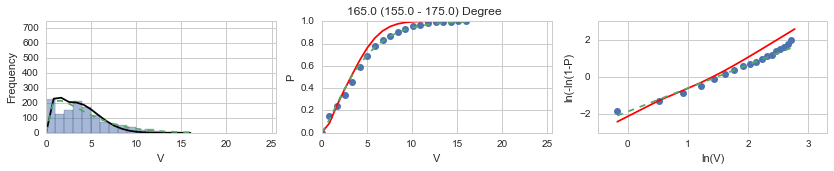

data size: 1286
max diff: 0.0876079890856 , speed value: 7.57520175719 y gmm 0.952304723145


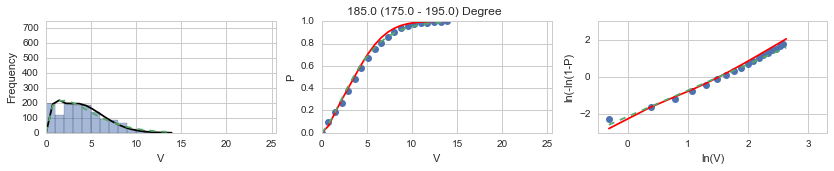

data size: 1330
max diff: 0.0477524179608 , speed value: 6.5920364669 y gmm 0.853015575856


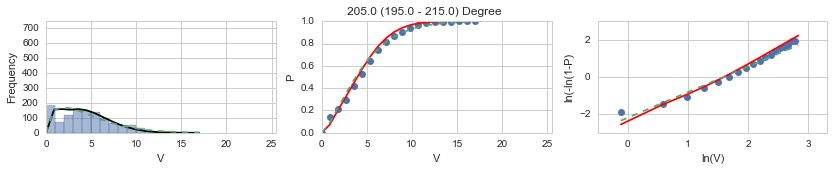

data size: 1137
max diff: 0.0656938758819 , speed value: 0.892867100128 y gmm 0.0750273202482


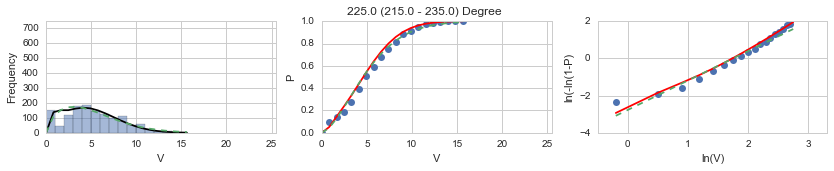

data size: 1323
max diff: 0.0577417208837 , speed value: 3.28636208492 y gmm 0.335141569712


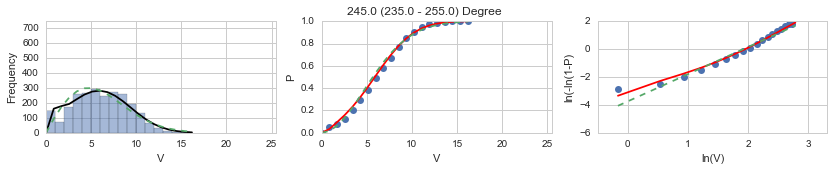

data size: 2430
max diff: 0.0335212530087 , speed value: 2.5544450992 y gmm 0.160270224202


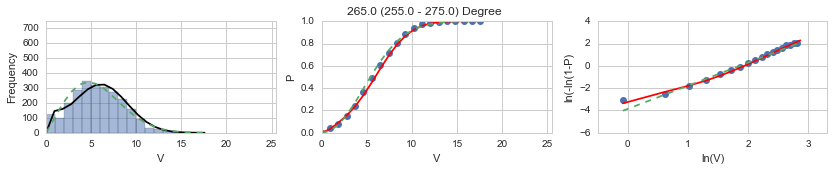

data size: 2482
max diff: 0.0404507024136 , speed value: 5.54911635124 y gmm 0.451894180745


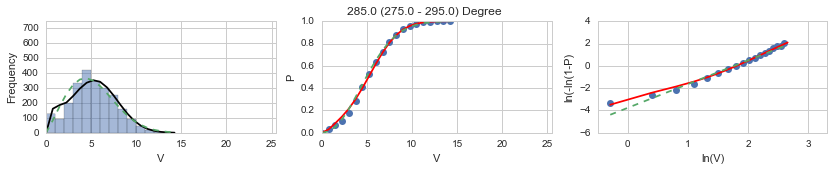

data size: 2391
max diff: 0.0415952110202 , speed value: 2.99775117787 y gmm 0.215999226077


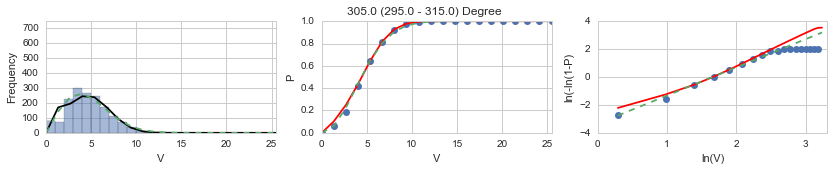

data size: 1601
max diff: 0.0632534831111 , speed value: 2.68171900421 y gmm 0.250636368808


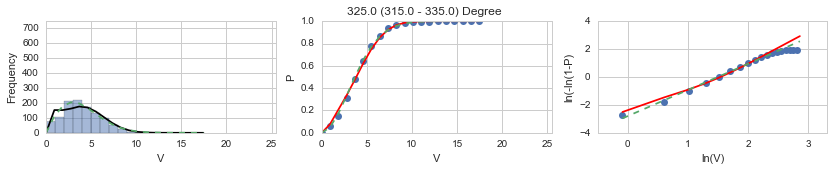

data size: 1108
max diff: 0.0556141223166 , speed value: 1.83566083332 y gmm 0.207238671053


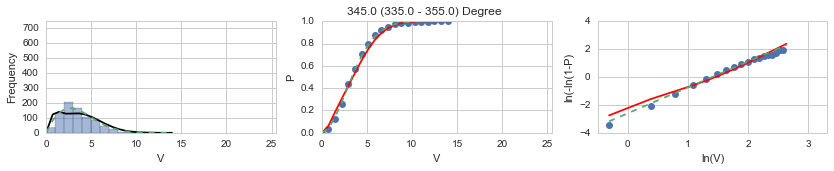

data size: 824
max diff: 0.0646022447243 , speed value: 1.4698443054 y gmm 0.185961468025


In [57]:
if len(effective_column) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

In [58]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull'])
def nominal_avg_and_weight_avg(df_weight, df_value):
    return np.average(df_value), np.sum(df_weight / df_weight.sum() * df_value)

_, gmm_mean = nominal_avg_and_weight_avg(diff_df.datasize, diff_df.gmm)
_, weibull_mean = nominal_avg_and_weight_avg(diff_df.datasize, diff_df.weibull)

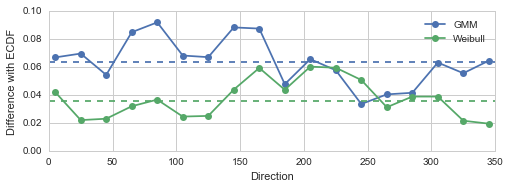

In [59]:
line, = plot(diff_df.direction, diff_df.gmm, '-', label = 'GMM', marker='o')
plt.axhline(gmm_mean, linestyle='--', color = line.get_color())
line,= plot(diff_df.direction, diff_df.weibull, '-', label = 'Weibull', marker='o')
plt.axhline(weibull_mean, linestyle='--', color = line.get_color())
plt_configure(xlabel='Direction', ylabel='Difference with ECDF', 
              legend={'loc':'best'},figsize=(8,2.5))
plt.locator_params(axis='y', nbins=5)

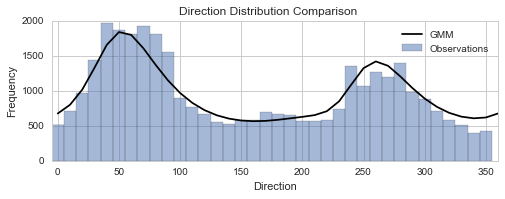

In [60]:
# Compare direction weight with previous figure
dir_fig

In [61]:
diff_df

datasize  direction       gmm  speed_gmm   weibull  speed_weibull
0        970        5.0  0.066946   3.940831  0.042082       3.940831
1       2420       25.0  0.069705   3.548463  0.022007       9.758272
2       3849       45.0  0.054403  10.466901  0.022990       6.280141
3       3748       65.0  0.085002   1.143450  0.031933       6.860702
4       3380       85.0  0.092072   3.044494  0.036676       3.044494
5       1662      105.0  0.068293   1.083370  0.024536       3.250111
6       1215      125.0  0.067125   0.817950  0.025011       3.271799
7       1103      145.0  0.088461   0.986531  0.043856       1.973063
8       1286      165.0  0.087608   7.575202  0.059387       3.366756
9       1330      185.0  0.047752   6.592036  0.043754       3.662242
10      1137      205.0  0.065694   0.892867  0.060326       2.678601
11      1323      225.0  0.057742   3.286362  0.059555       3.286362
12      2430      245.0  0.033521   2.554445  0.050750       6.811854
13      2482      265.0  0.040451   5.549116  0.031228       3.699411
14      2391      285.0  0.041595   2.997751  0.038881       2.997751
15      1601      305.0  0.063253   2.681719  0.038874       2.681719
16      1108      325.0  0.055614   1.835661  0.021558       2.753491
17       824      345.0  0.064602   1.469844  0.019452       2.204766

### 5.3.1 Variability over the years

85.0 (75.0 - 95.0) Degree Speed Distribution


(0, 0.25)

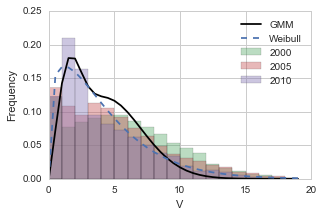

In [62]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

x_vals = arange(0, max_speed, 0.5)

# 1. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.02
plot(x_vals, y_vals,'-', color='black', label = 'GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x_vals, *weibull_params)
plot(x_vals, y_weibull,'--', label='Weibull')

# 3. Data
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), normed=True,alpha=0.4,
                                              label=str(start_time//10000))

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
plt_configure(xlabel='V',ylabel='Frequency',legend=True, figsize=(4.7,3))
plt.gca().set_ylim(bottom = 0)

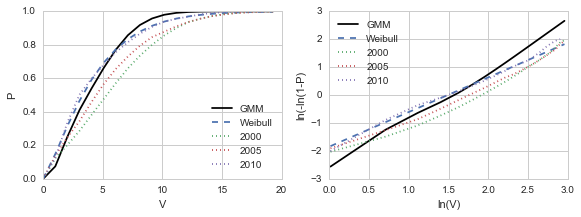

In [63]:
fig = plt.figure(figsize=(9.4,3))
ax1, ax2 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2) 
x = linspace(0, max_speed, 20)
    
# 1. GMM    
y_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(log(x), log(-log(1-y_gmm)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--', label='Weibull')
ax2.plot(log(x), log(-log(1-y_weibull)), '--', label='Weibull')

# 3. Data
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_cdf = ecdf(x)
        
        ax1.plot(x, y_cdf,':', label = start_time//10000)
        ax2.plot(log(x), log(-log(1-y_cdf)),':', label = start_time//10000)
       
ax1=fig.add_subplot(1,2,1)
plt_configure(xlabel='V',ylabel='P',legend={'loc':'best'})

ax2 = fig.add_subplot(1,2,2) 
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

### 5.3.2 Bootstrap, to see the variability of each sector

In [64]:
FRACTION = 0.5 

85.0 (75.0 - 95.0) Degree Speed Distribution


(0, 400.0)

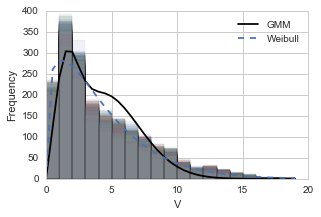

In [65]:
x_vals = arange(0, max_speed, 0.5)

# 1. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.02 *len(sub_df.speed)*FRACTION
plot(x_vals, y_vals,'-', color='black', label='GMM')

# 2. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x_vals, *weibull_params)*len(sub_df.speed)*FRACTION
plot(x_vals, y_weibull,'--',label='Weibull')

# 3. Data Resampled
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=arange(0, max_speed), alpha=0.1)
    if i == 1: plt_configure(xlabel='V',ylabel='Frequency',legend=True, figsize=(4.7,3))

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
plt.gca().set_ylim(bottom = 0)

0.0775750188896 3.04449425016 0.410590661584


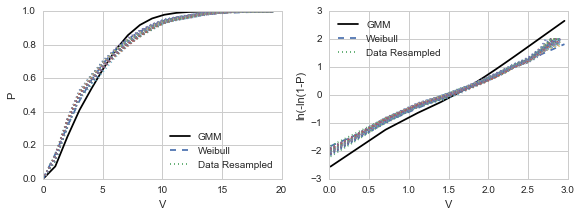

In [66]:
fig = plt.figure(figsize=(9.4,3))
ax1, ax2 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2) 

# 1. GMM
x = linspace(0, max_speed, 20)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1.plot(x, y_gmm,'-', color = 'black', label='GMM')
ax2.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',label='Weibull')
ax2.plot(log(x), log(-log(1-y_weibull)),'--',label='Weibull')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_cdf = ecdf(x)
    
    ax1 = fig.add_subplot(1,2,1) 
    plot(x, y_cdf,':', label='Data Resampled')
    if i == 1: plt_configure(xlabel='V',ylabel='P',legend={'loc':'best'})

    ax3 = fig.add_subplot(1,2,2) 
    plot(log(x), log(-log(1-y_cdf)),':', label='Data Resampled')
    if i == 1: plt_configure(xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Result Variability & Cross-Validation

In [67]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
points = FITTING_RANGE
    
def fit_gmm(df, fit_method, number_of_gaussian = 3, ):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.538  0.756   2.349  3.856  3.445  0.475
2  0.307  0.503  -4.499  3.071  3.277  0.437
3  0.155  0.226   0.716  0.970  1.088  0.182

GMM Plot Result
0.537935210151 [[ 0.75579882  2.34900666]] [ 2.6247111   4.45548789] -51.6980108599
0.307033802906 [[ 0.50309062 -4.49891127]] [ 2.37386493  3.81203833] 139.224387421
0.155030986943 [[ 0.22636739  0.71563416]] [ 0.91387208  1.13555639] 151.177208218


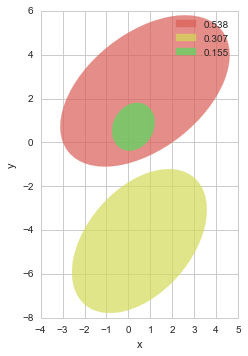

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.031      0.139  2.151379e-07      0.015       0.251

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.738   0.805  -0.681  3.189  5.477  0.367
2  0.143  -0.170   2.048  3.725  1.869  0.590
3  0.119   0.145   0.574  0.847  0.970  0.164

GMM Plot Result
0.737938906382 [[ 0.80512254 -0.68118327]] [ 2.87668889  5.64767067] 163.542320847
0.142781627575 [[-0.17030712  2.0480453 ]] [ 1.43638541  3.91167783] -70.8170308378
0.119279466042 [[ 0.14500863  0.57378289]] [ 0.80914387  1.00207128] 154.778099561


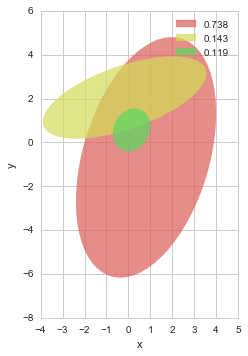

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.023      0.264  1.607360e-07      0.013       0.217

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.544  0.834   2.309  3.778  3.444  0.462
2  0.299  0.382  -4.712  3.076  3.107  0.395
3  0.158  0.221   0.715  0.959  1.099  0.172

GMM Plot Result
0.543545205356 [[ 0.83357738  2.30919659]] [ 2.63247839  4.38207666] -50.6774539556
0.298865116883 [[ 0.38241187 -4.71218359]] [ 2.40510226  3.65128023] 135.711222928
0.157589677761 [[ 0.22144698  0.7146761 ]] [ 0.91239271  1.13851757] 154.204534746


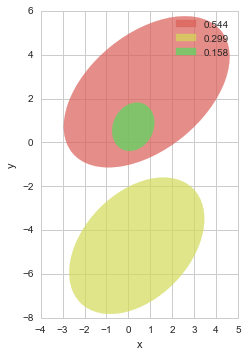

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.030      0.175  1.863686e-07      0.014       0.233

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.510  0.669   2.469  3.829  3.394  0.509
2  0.347  0.527  -4.159  2.984  3.578  0.390
3  0.143  0.183   0.658  0.940  1.061  0.145

GMM Plot Result
0.509814436686 [[ 0.66853224  2.46940184]] [ 2.50744265  4.45985438] -51.6694727612
0.347228117243 [[ 0.52739735 -4.15868114]] [ 2.50118792  3.93125699] 147.533424564
0.142957446071 [[ 0.18308521  0.65816097]] [ 0.90373068  1.09216949] 154.971996482


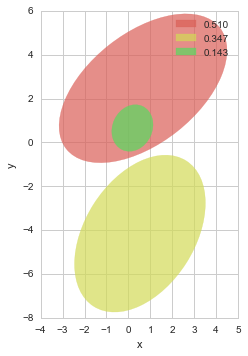

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.029      0.289  1.858096e-07      0.014       0.233

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.568  0.809   2.163  3.717  3.465  0.450
2  0.284  0.383  -4.797  3.089  3.069  0.423
3  0.148  0.184   0.693  0.945  1.101  0.160

GMM Plot Result
0.568163011927 [[ 0.80865214  2.16282937]] [ 2.65544154  4.33285582] -49.4378353278
0.283872182612 [[ 0.3834453  -4.79713408]] [ 2.33910975  3.6732559 ] -45.4390115258
0.147964805461 [[ 0.18376283  0.69320174]] [ 0.9061493   1.13237617] 156.873505652


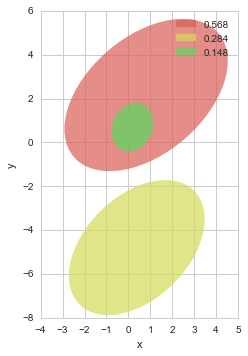

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.031      0.122  1.920974e-07      0.015       0.236

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.566  0.744   2.146  3.826  3.541  0.467
2  0.281  0.386  -4.800  3.026  3.099  0.388
3  0.153  0.212   0.702  0.972  1.092  0.175

GMM Plot Result
0.56561033512 [[ 0.7443031   2.14555795]] [ 2.67841535  4.47301064] -49.7130179758
0.281059795987 [[ 0.38567356 -4.80030812]] [ 2.39539388  3.608526  ] 136.742693692
0.153329868893 [[ 0.21246624  0.70205274]] [ 0.9194983   1.13645225] 151.753200876


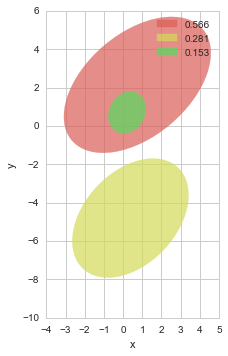

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.030      0.138  1.889940e-07      0.015       0.235

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.547  0.764   2.256  3.837  3.528  0.478
2  0.293  0.444  -4.562  2.977  3.209  0.400
3  0.159  0.217   0.699  0.992  1.107  0.168

GMM Plot Result
0.547361221587 [[ 0.76382492  2.25631874]] [ 2.64938523  4.48933319] -49.9854058911
0.293417551518 [[ 0.44357027 -4.56227792]] [ 2.38579196  3.66939564] 140.313668158
0.159221226895 [[ 0.2166996   0.69908382]] [ 0.9407569   1.15113203] 151.572142241


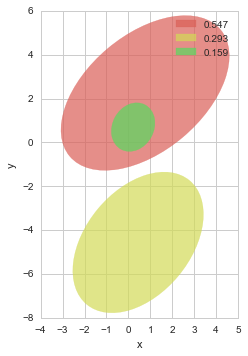

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.028      0.112  1.945779e-07      0.015       0.238

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.552  0.846   2.284  3.807  3.315  0.453
2  0.296  0.339  -4.779  3.142  3.006  0.386
3  0.152  0.188   0.687  0.945  1.085  0.162

GMM Plot Result
0.551745197894 [[ 0.84550899  2.283874  ]] [ 2.60073604  4.32583258] -53.5271899773
0.296178154607 [[ 0.33920376 -4.77921831]] [ 2.40618733  3.62245349] -48.2773493552
0.152076647499 [[ 0.18799461  0.68690313]] [ 0.90368237  1.11977658] 155.295188963


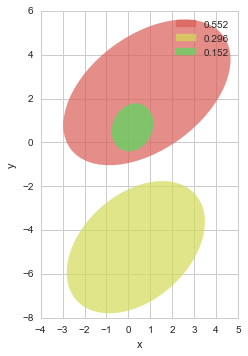

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.032      0.336  1.886957e-07      0.014       0.234

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.558  0.793   2.215  3.769  3.492  0.473
2  0.290  0.488  -4.657  3.033  3.088  0.405
3  0.152  0.204   0.708  0.947  1.092  0.155

GMM Plot Result
0.558040314804 [[ 0.79337704  2.21469967]] [ 2.62539349  4.41692636] -49.5842520557
0.289802715747 [[ 0.48823752 -4.65729484]] [ 2.36106607  3.62783395] 136.261738245
0.15215696945 [[ 0.20416408  0.70773067]] [ 0.90882561  1.12370922] 156.32217479


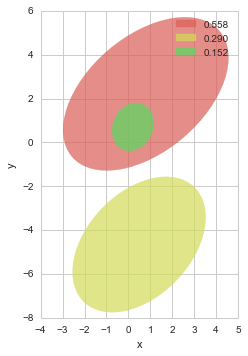

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.032      0.278  2.014372e-07      0.015       0.242

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.560  0.811   2.223  3.751  3.448  0.455
2  0.291  0.403  -4.664  3.087  3.089  0.380
3  0.149  0.189   0.682  0.924  1.088  0.143

GMM Plot Result
0.560273305404 [[ 0.81069807  2.22315342]] [ 2.64461738  4.35477883] -50.2520200559
0.291208601467 [[ 0.40334616 -4.66396744]] [ 2.43126635  3.62783331] 135.069875459
0.14851809313 [[ 0.18894861  0.68237249]] [ 0.89467003  1.11265915] 159.484726762


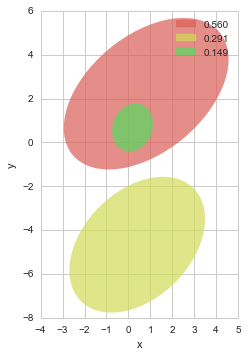

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.032      0.194  1.944888e-07      0.015       0.238

In [68]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, number_of_gaussian=NUMBER_OF_GAUSSIAN, fit_method=FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))

## 6.2 Cross-validation, to select the number of Gaussian

In [69]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, fit_method = FIT_METHOD, number_of_gaussian=number_of_gaussian)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 25889.25 8629.75
  
Number of gaussian 1
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.257986  0.063093  0.000003    0.054477     0.879792  0.748617
1    0.258995  0.063657  0.000003    0.054991     0.894204  0.742982
2    0.244690  0.064156  0.000003    0.055262     0.880581  0.748565
3    0.255457  0.062678  0.000003    0.054936     0.879914  0.746547

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.262192  0.061086  0.000003    0.056563     0.900091  0.738739
1    0.262309  0.059219  0.000002    0.054492     0.848984  0.759998
2    0.316830  0.057321  0.000003    0.053809     0.891095  0.742460
3    0.251553  0.076240  0.000003    0.055956     0.912654  0.737495

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.169556  0.029095  2.870861e-07    0.017824     0.288943  0.973017
1    0.130998  0.029006  2.796804e-07    0.017898     0.285683  0.973423
2    0.154320  0.028893  2.738651e-07    0.017602     0.282427  0.973834
3    0.137086  0.029027  2.840546e-07    0.017844     0.288087  0.973354

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.135123  0.024250  2.891743e-07    0.018526     0.291396  0.972172
1    0.194427  0.030386  3.084055e-07    0.018170     0.299379  0.971276
2    0.149091  0.033651  3.300216e-07    0.019140     0.310583  0.969754
3    0.189240  0.027734  3.027457e-07    0.018587     0.296070  0.970695

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.400637  0.019456  1.655026e-07    0.013710     0.219738  0.984400
1    0.152317  0.029477  1.923687e-07    0.014672     0.236812  0.981854
2    0.183647  0.030762  1.875084e-07    0.014494     0.233771  0.982203
3    0.141986  0.030507  1.785538e-07    0.014198     0.228078  0.983063

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.447440  0.018285  1.814454e-07    0.014112     0.229711  0.982683
1    0.197205  0.025755  2.017897e-07    0.015214     0.242526  0.980788
2    0.138597  0.030161  2.158684e-07    0.015709     0.250941  0.979825
3    0.278436  0.034277  2.454336e-07    0.016558     0.267727  0.977026

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.048709  0.009425  5.908593e-08    0.008198     0.131223  0.994413
1    0.032376  0.010703  5.806980e-08    0.008019     0.130101  0.994509
2    0.052386  0.009786  6.636852e-08    0.008570     0.139017  0.993802
3    0.052317  0.010707  5.711900e-08    0.008116     0.129136  0.994527

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.081406  0.008973  9.887391e-08    0.010392     0.169845  0.990664
1    0.148986  0.012277  9.989330e-08    0.010877     0.170673  0.990565
2    0.046717  0.012560  9.065780e-08    0.010373     0.162840  0.991115
3    0.055036  0.020236  1.356886e-07    0.011935     0.198437  0.987698

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.051886  0.010882  4.235086e-08    0.006838     0.111045  0.996004
1    0.158845  0.006816  4.707682e-08    0.007243     0.117152  0.995569
2    0.078444  0.008592  4.928846e-08    0.007524     0.119927  0.995278
3    0.145041  0.007305  4.654845e-08    0.007277     0.116497  0.995620

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.074237  0.012078  8.144769e-08    0.009867     0.154368  0.992251
1    0.086657  0.018415  7.893913e-08    0.009562     0.151681  0.992433
2    0.207376  0.016796  7.978962e-08    0.009207     0.152287  0.992748
3    0.109352  0.016225  7.706299e-08    0.009174     0.149848  0.992608

  
Number of gaussian 6
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.017456  0.002573  2.068762e-08    0.004828     0.077645  0.998031
1    0.015421  0.003057  2.354460e-08    0.005082     0.082802  0.997806
2    0.017353  0.003217  2.573209e-08    0.005390     0.086617  0.997555
3    0.017936  0.002695  2.242289e-08    0.005083     0.080900  0.997870

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.024194  0.009296  5.886893e-08    0.008134     0.131067  0.994540
1    0.051472  0.007938  5.640397e-08    0.008296     0.128437  0.994427
2    0.032360  0.006368  4.498307e-08    0.007089     0.114484  0.995809
3    0.017955  0.006990  6.431769e-08    0.008226     0.136672  0.994010

In [70]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.254282  0.063396  2.678518e-06    0.054916     0.883623  0.746678
1    0.147990  0.029005  2.811715e-07    0.017792     0.286285  0.973407
2    0.219647  0.027550  1.809834e-07    0.014268     0.229600  0.982880
3    0.046447  0.010155  6.016081e-08    0.008226     0.132369  0.994313
4    0.108554  0.008399  4.631614e-08    0.007220     0.116155  0.995618
5    0.017042  0.002885  2.309680e-08    0.005096     0.081991  0.997816

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.273221  0.063467  2.708276e-06    0.055205     0.888206  0.744673
1    0.166970  0.029005  3.075868e-07    0.018606     0.299357  0.970974
2    0.265419  0.027120  2.111343e-07    0.015398     0.247726  0.980081
3    0.083036  0.013511  1.062784e-07    0.010894     0.175449  0.990010
4    0.119405  0.015879  7.930986e-08    0.009452     0.152046  0.992510
5    0.031495  0.007648  5.614341e-08    0.007936     0.127665  0.994696

R_square


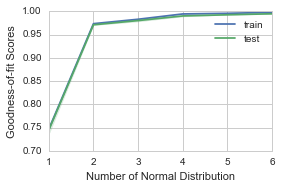

K_S


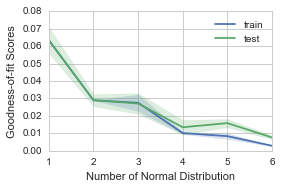

Chi_square


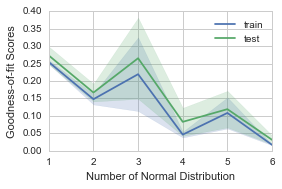

In [71]:
prop_cycle=mpl.rcParams['axes.color_cycle']
for column in ['R_square','K_S','Chi_square', ]:
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print column
    plt_configure(xlabel='Number of Normal Distribution', ylabel='Goodness-of-fit Scores', 
                  figsize=(4,2.5), legend={'loc':'best'})
    plt.show()

In [72]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)

## 6.3 Variability of KDE

In [73]:
sss

NameError: name 'sss' is not defined

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        